<a href="https://colab.research.google.com/github/KARTIKEYgarg1/udemy-data-science-and-ml/blob/master/covid19analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
"""Lecture:93"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [68]:
df=pd.read_csv("covid19.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [69]:
del df["Province/State"]
df.rename(columns={"Country/Region":"Country"},inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [70]:
imputer=SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df3=df2.groupby(['Country','Date'])[['Confirmed','Deaths','Date',"Recovered"]].sum().reset_index()
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
22367,Zimbabwe,2020-05-15,42,4,13
22368,Zimbabwe,2020-05-16,42,4,13
22369,Zimbabwe,2020-05-17,44,4,17
22370,Zimbabwe,2020-05-18,46,4,18


In [71]:
total_countries=df3['Country'].unique()
len(total_countries)

188

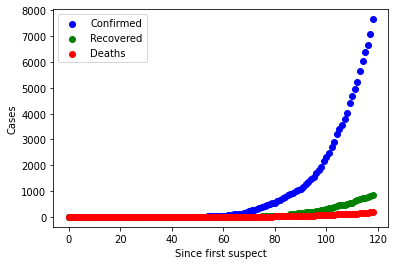

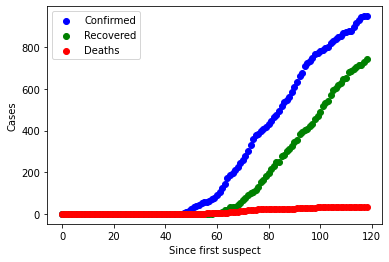

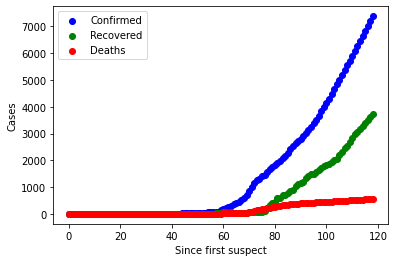

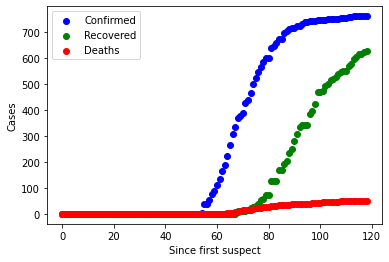

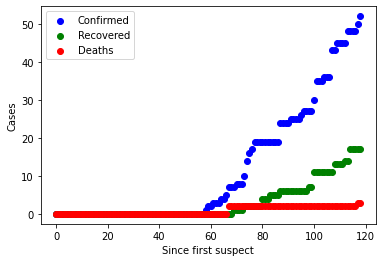

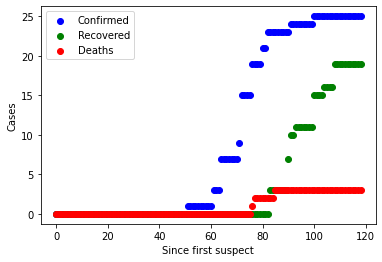

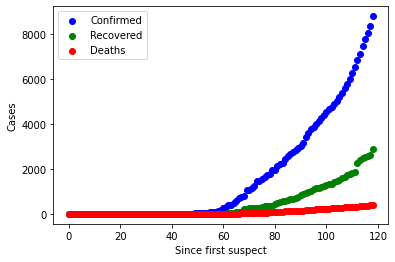

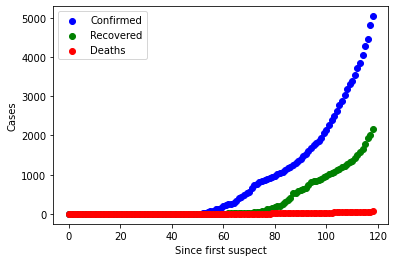

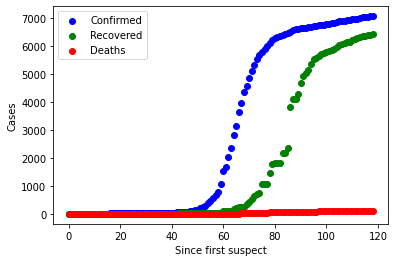

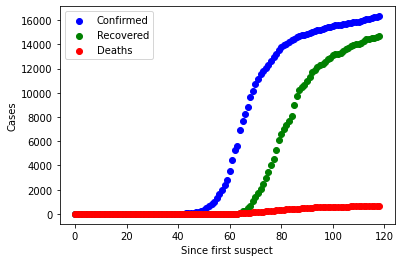

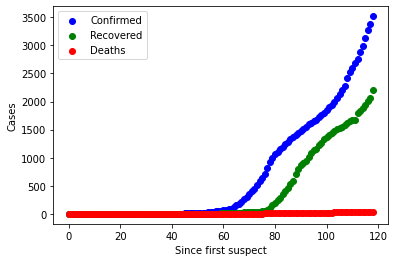

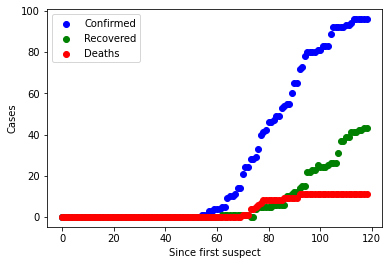

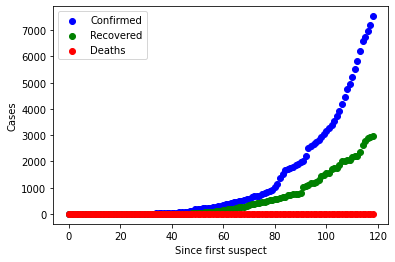

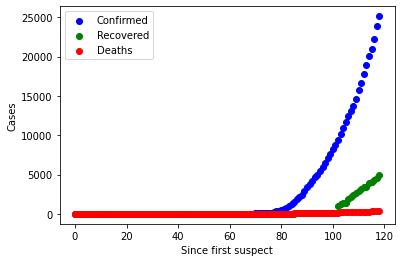

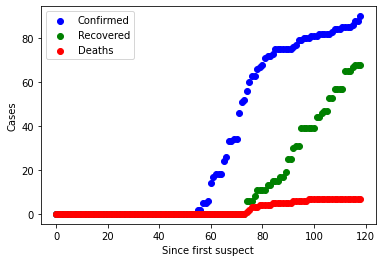

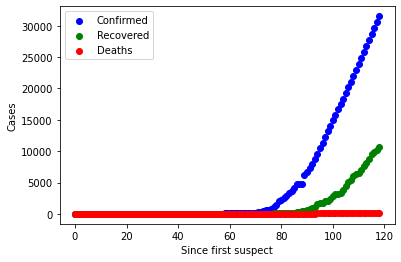

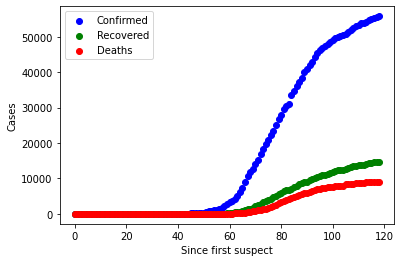

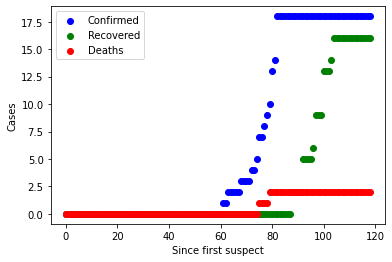

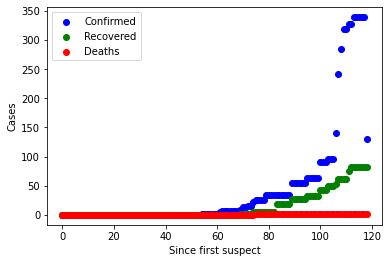

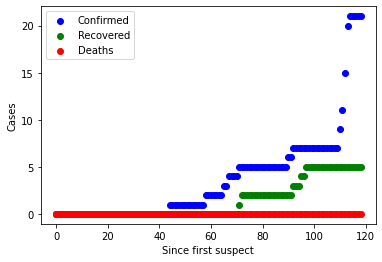

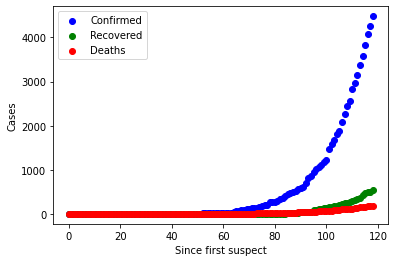

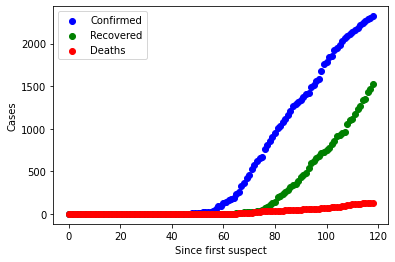

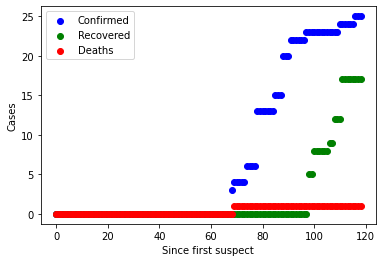

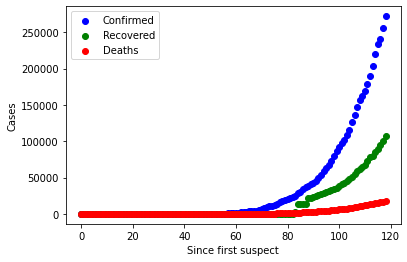

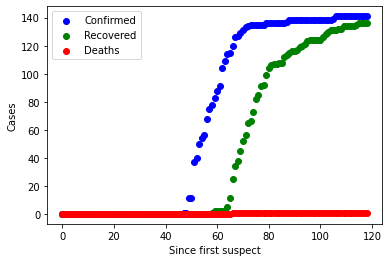

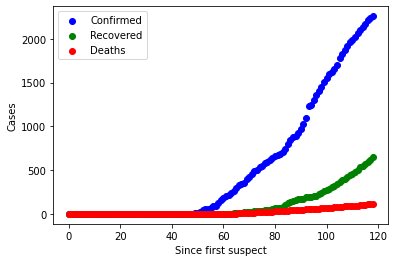

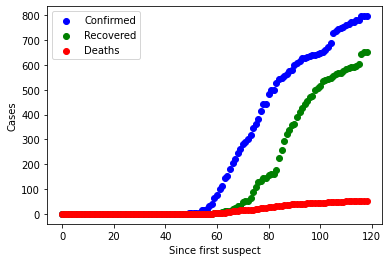

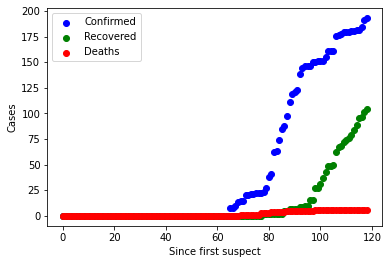

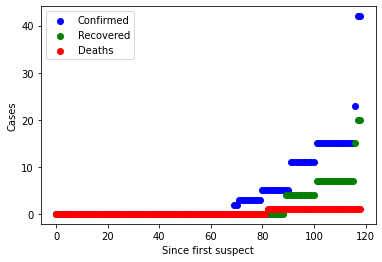

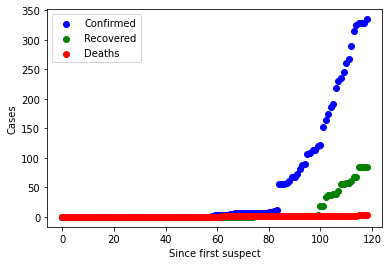

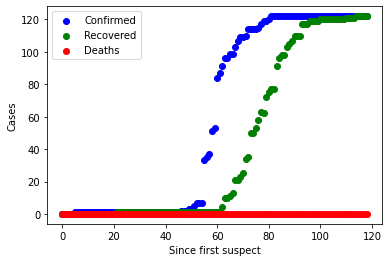

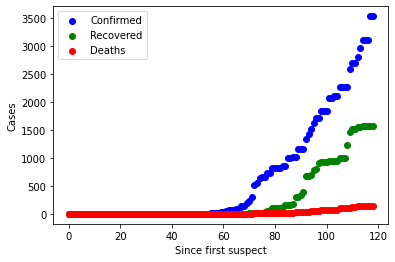

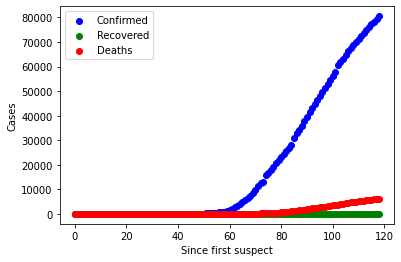

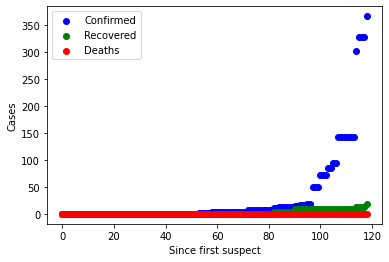

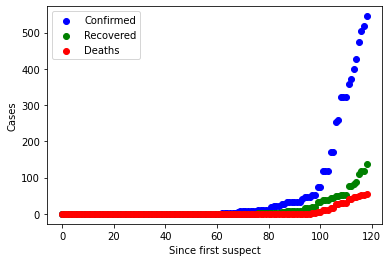

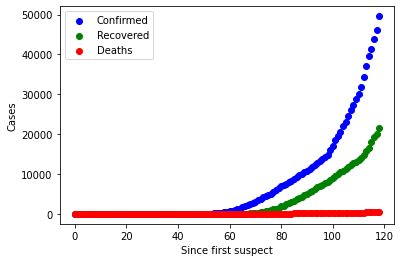

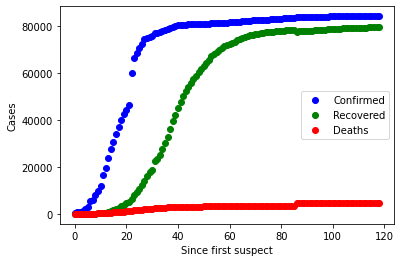

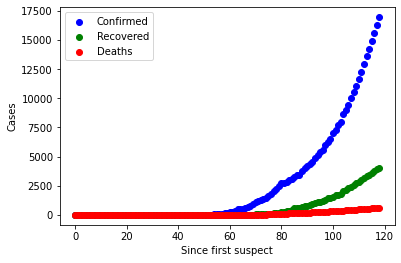

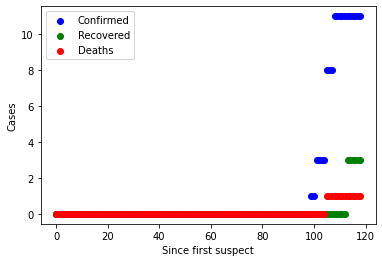

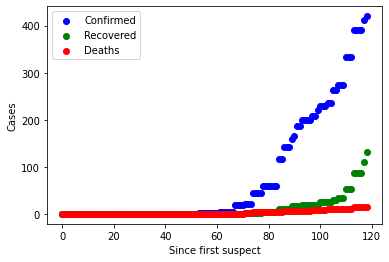

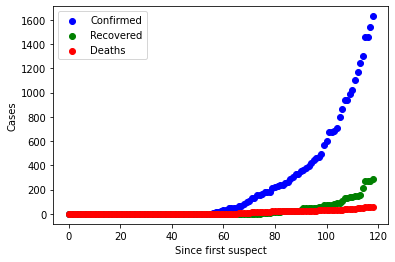

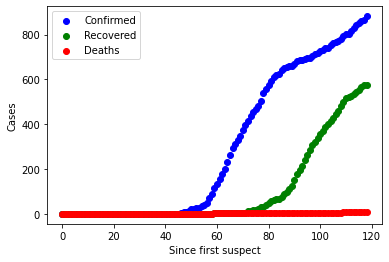

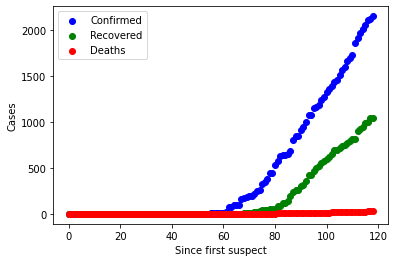

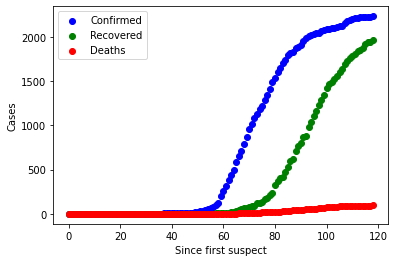

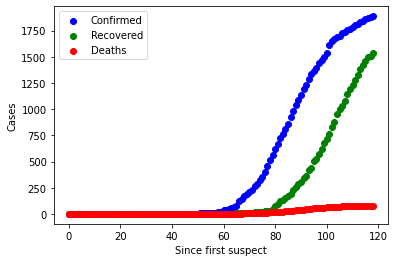

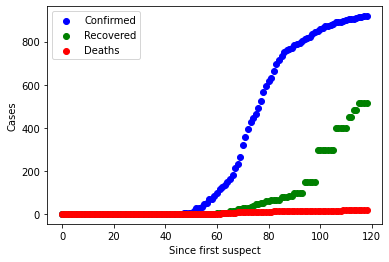

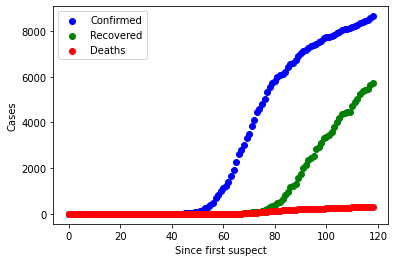

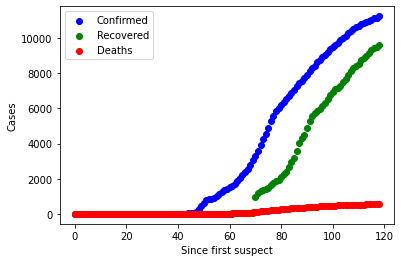

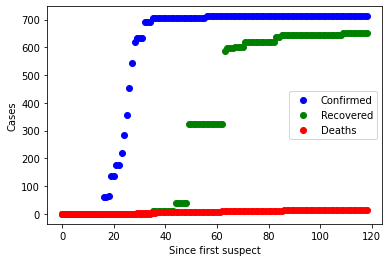

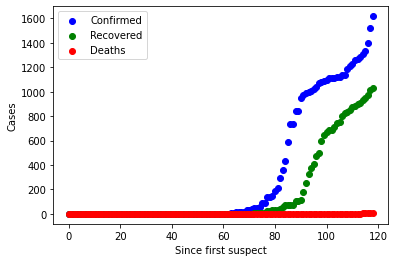

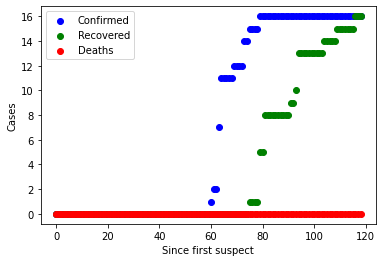

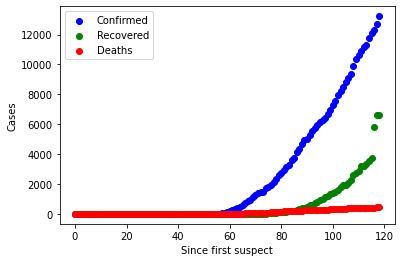

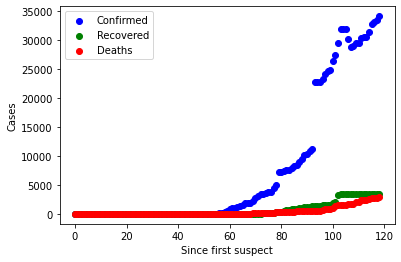

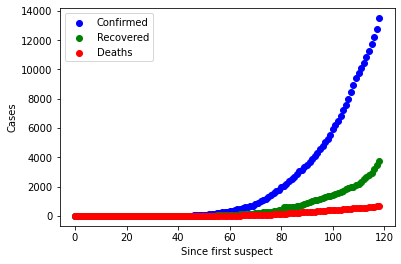

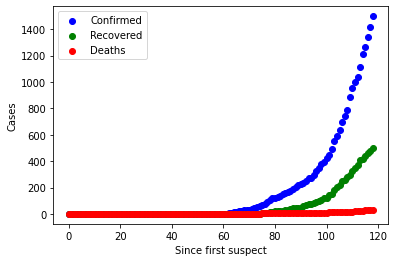

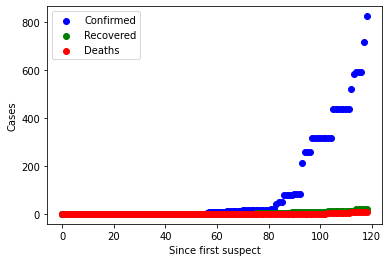

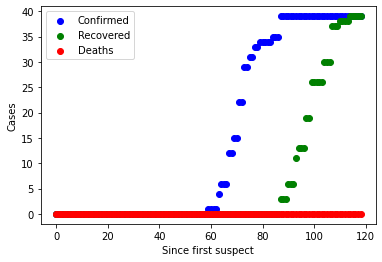

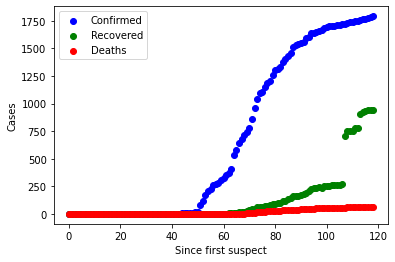

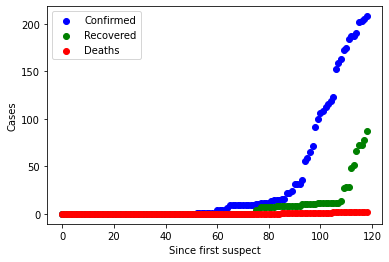

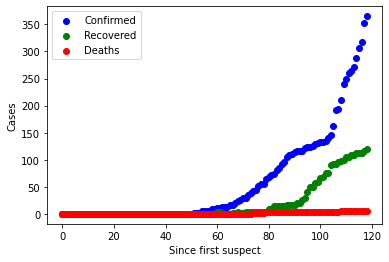

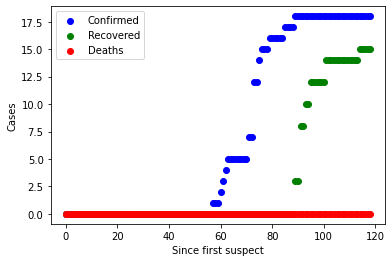

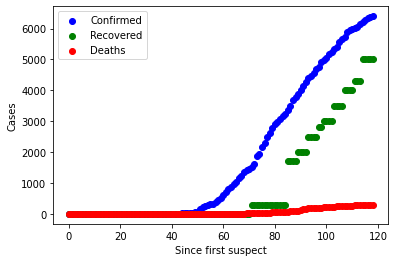

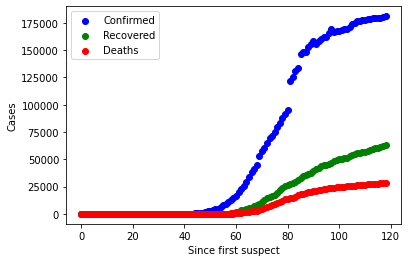

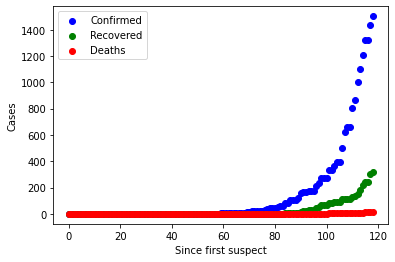

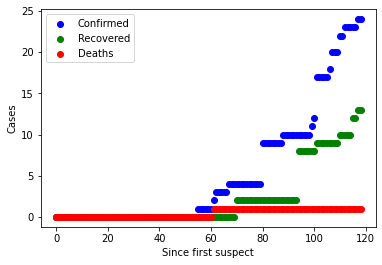

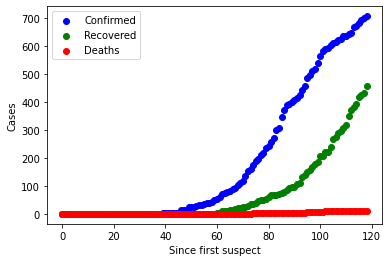

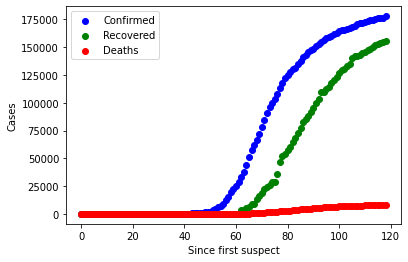

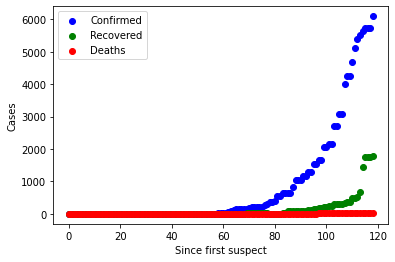

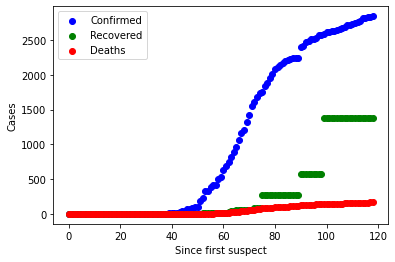

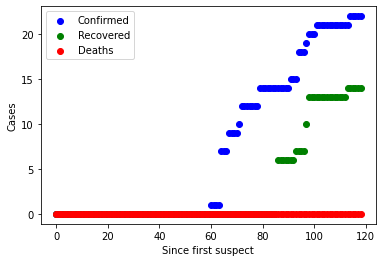

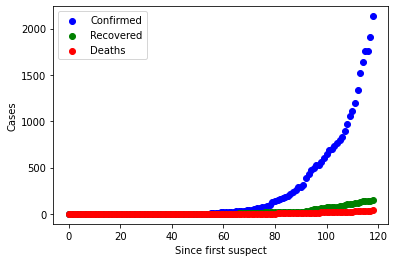

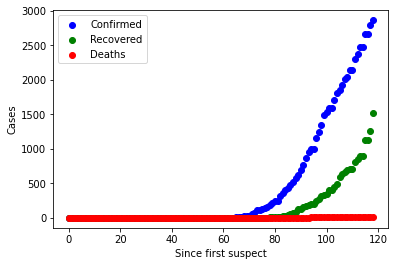

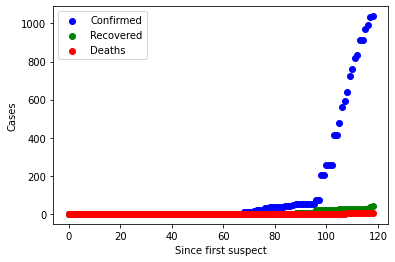

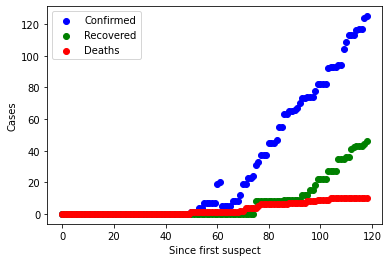

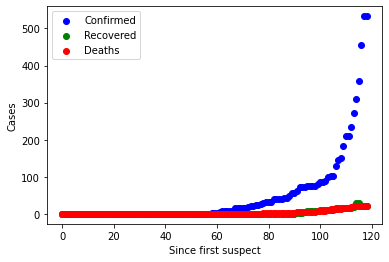

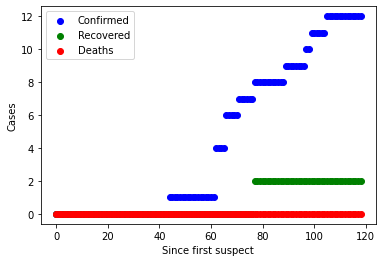

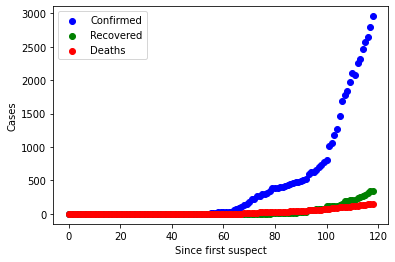

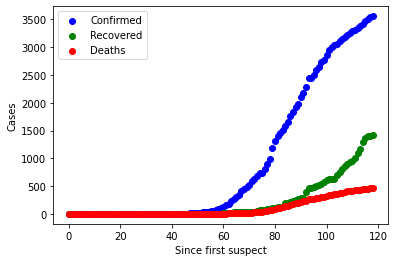

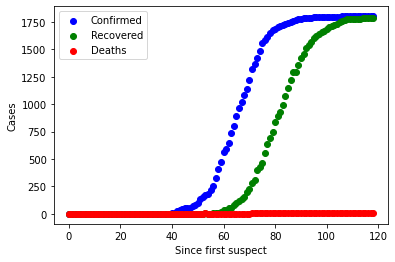

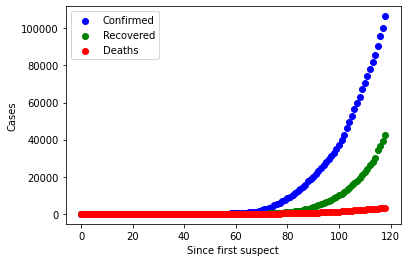

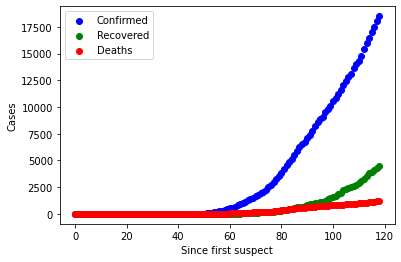

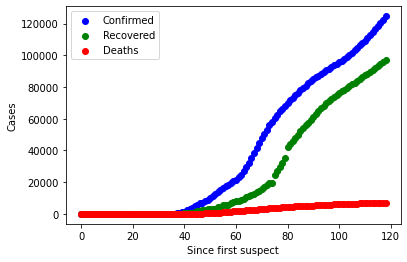

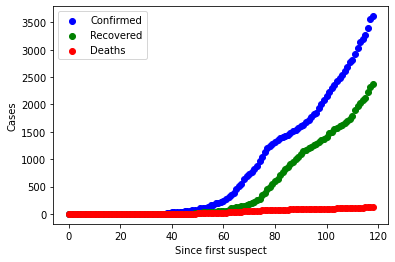

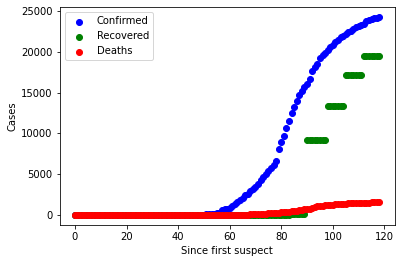

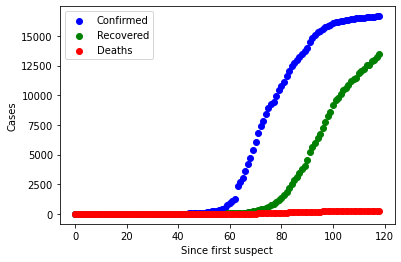

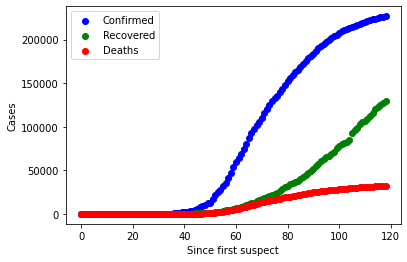

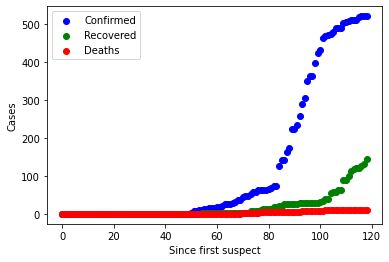

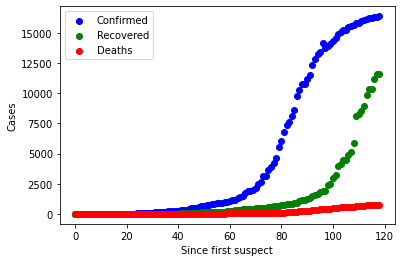

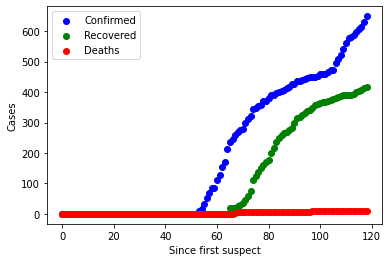

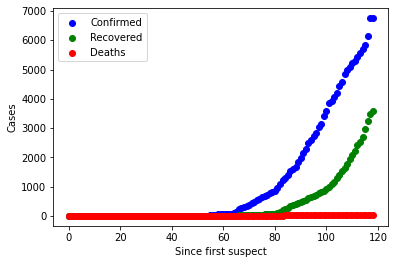

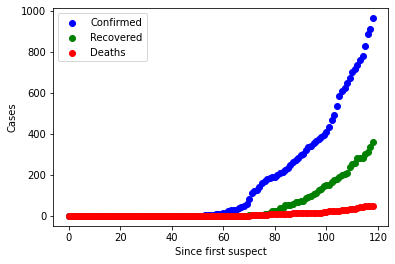

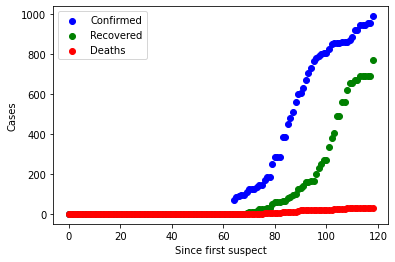

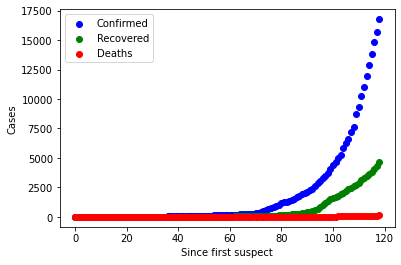

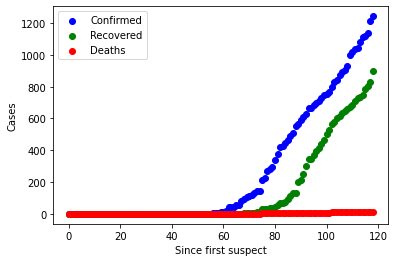

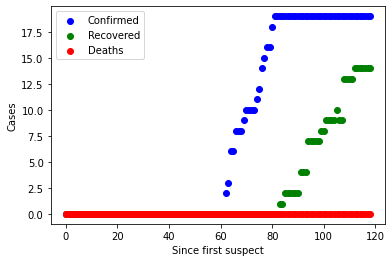

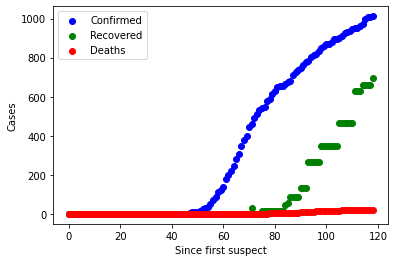

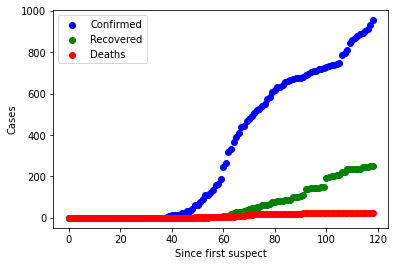

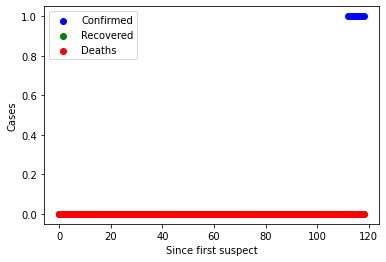

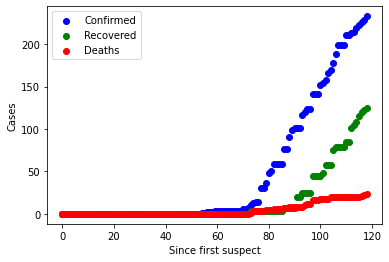

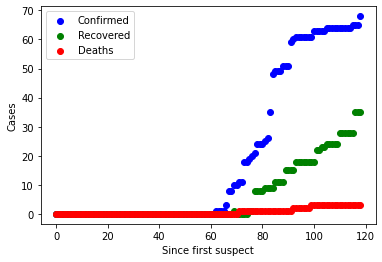

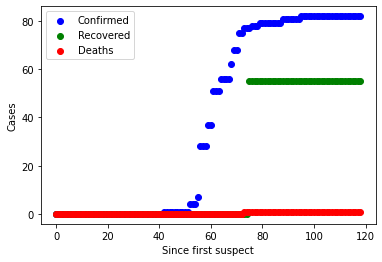

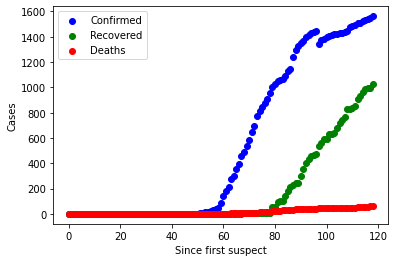

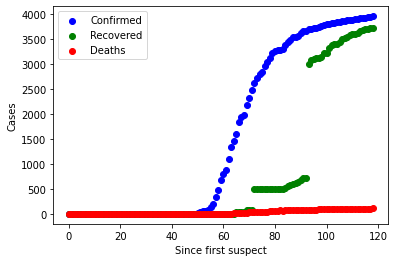

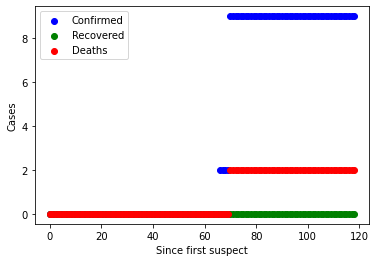

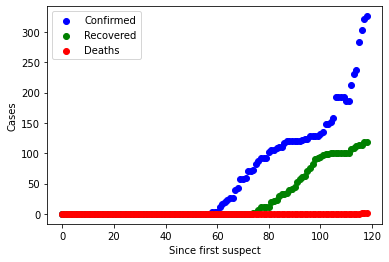

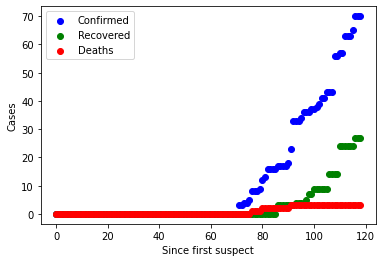

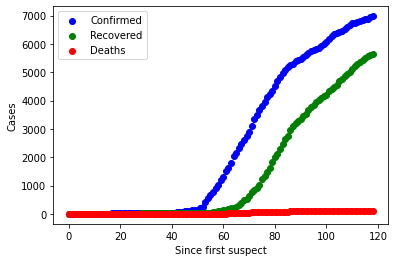

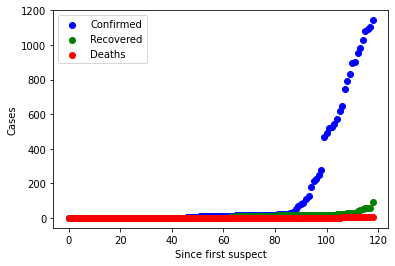

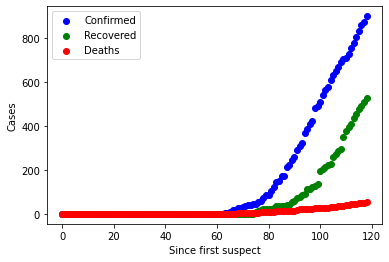

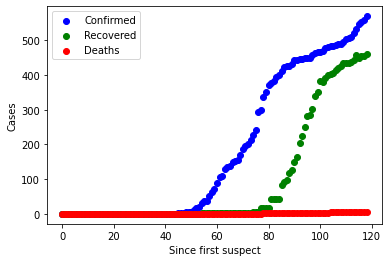

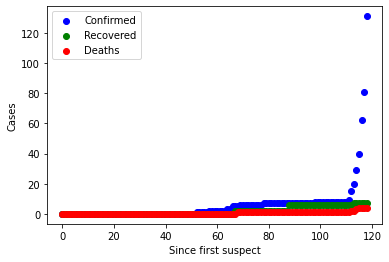

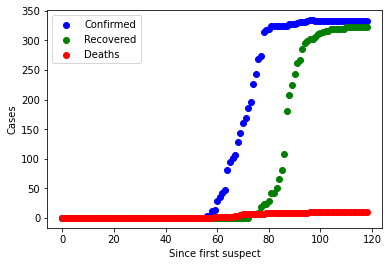

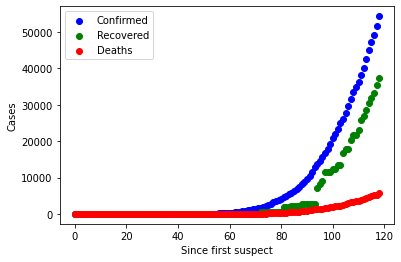

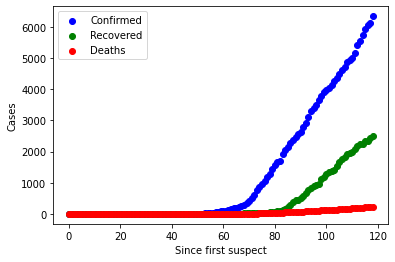

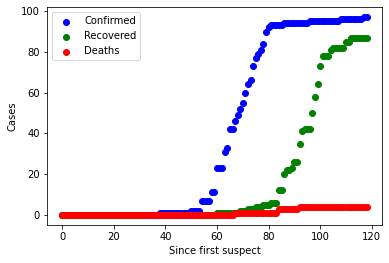

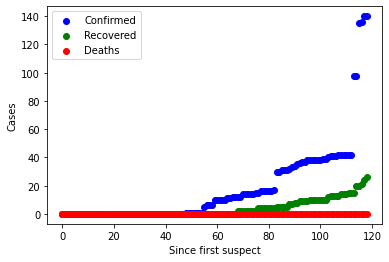

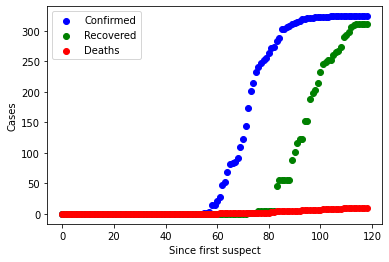

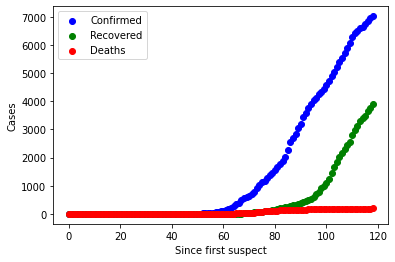

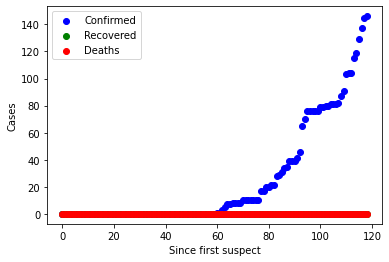

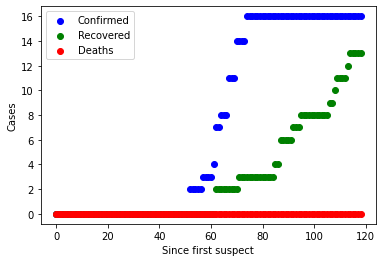

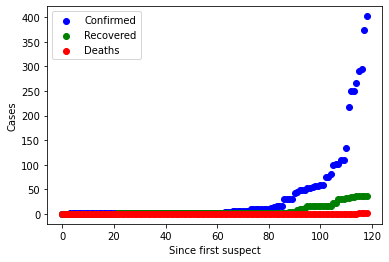

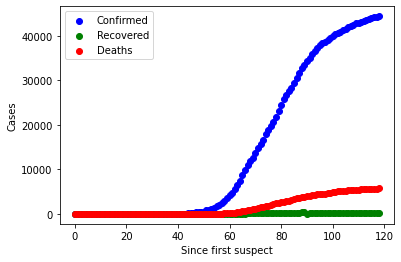

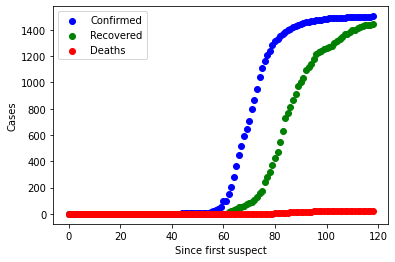

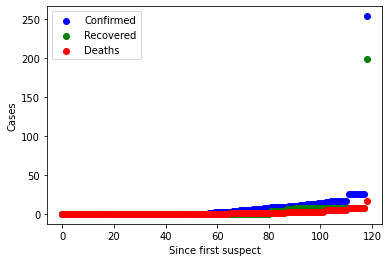

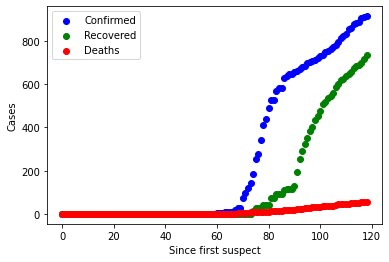

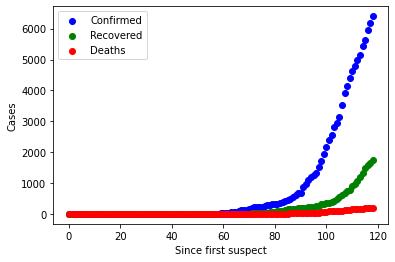

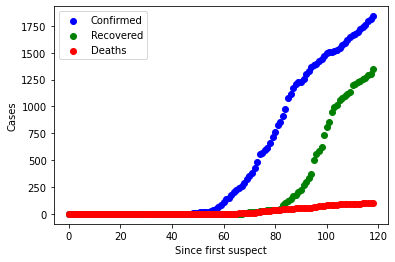

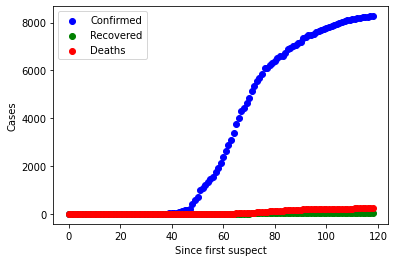

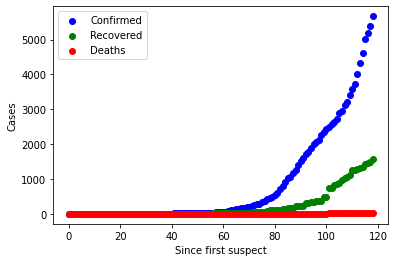

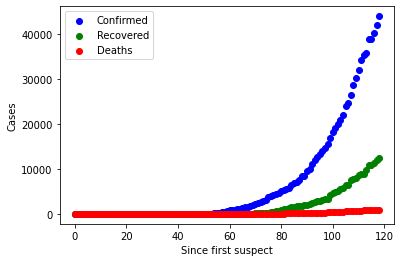

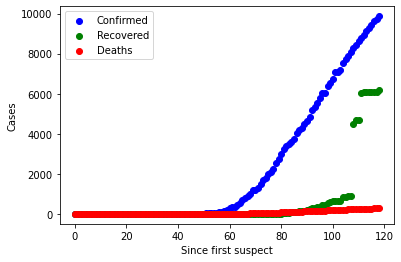

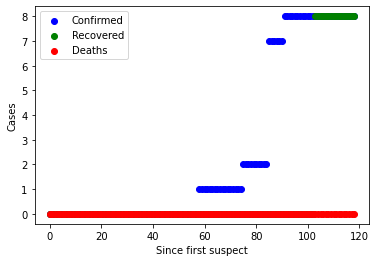

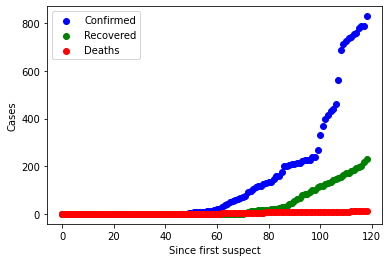

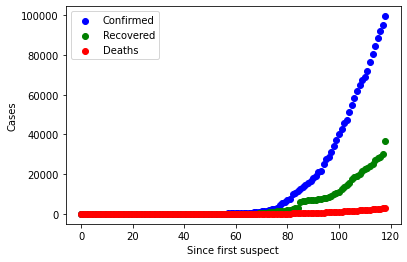

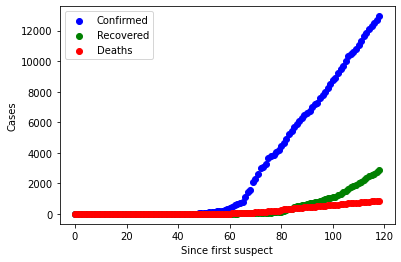

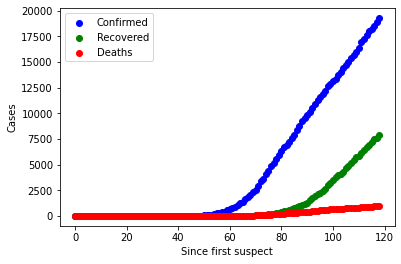

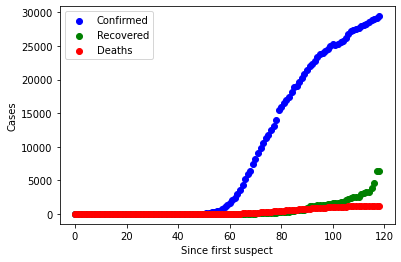

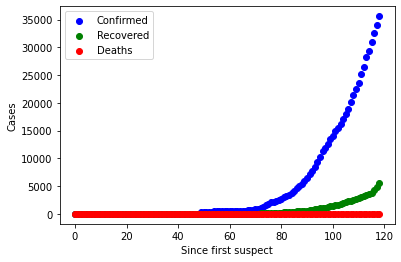

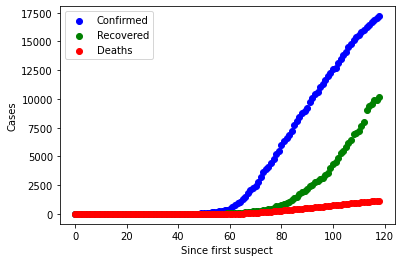

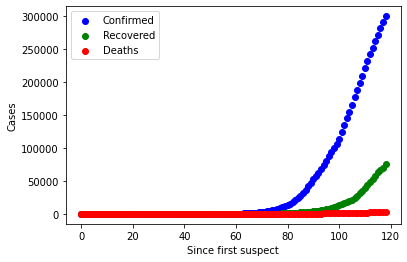

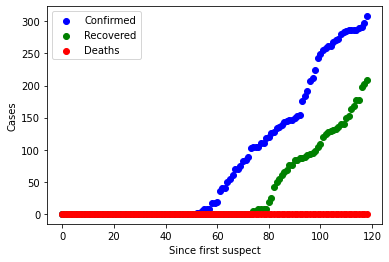

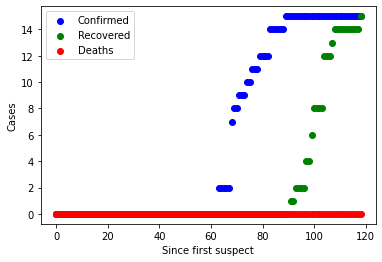

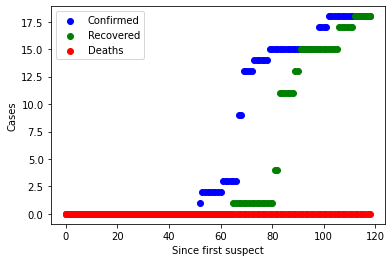

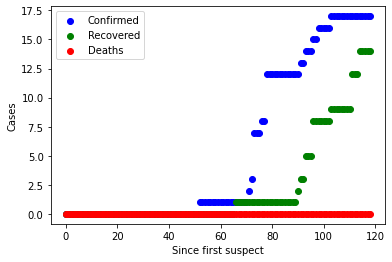

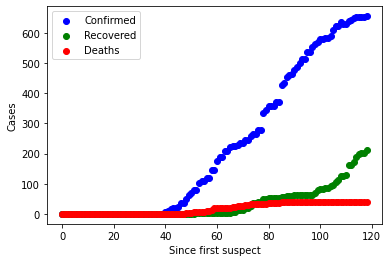

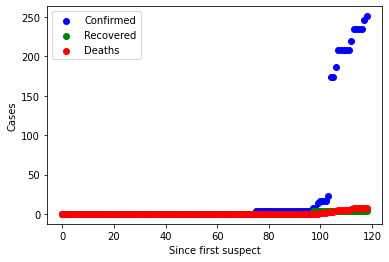

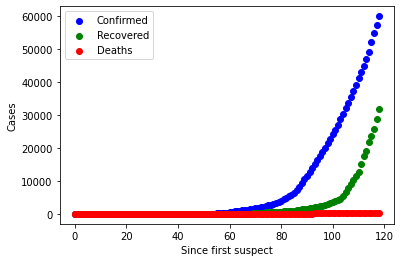

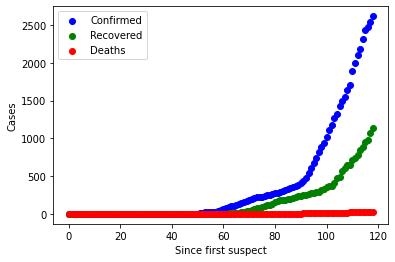

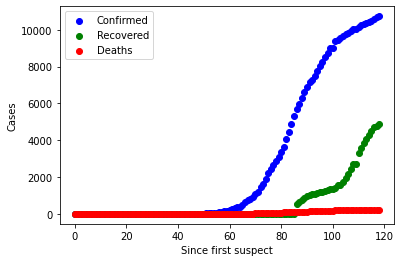

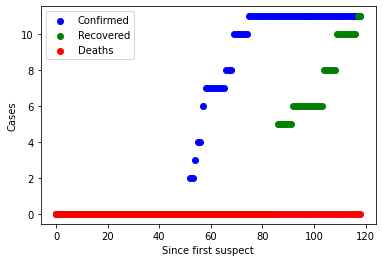

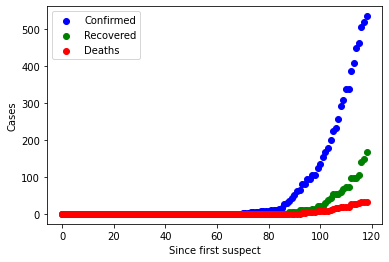

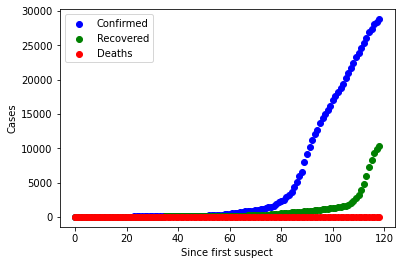

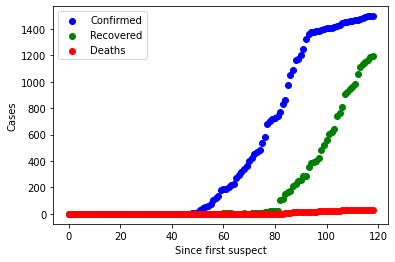

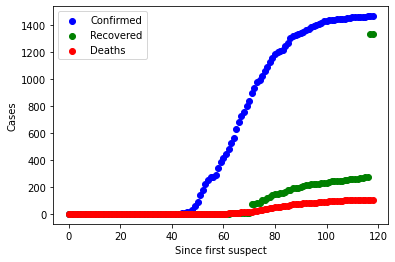

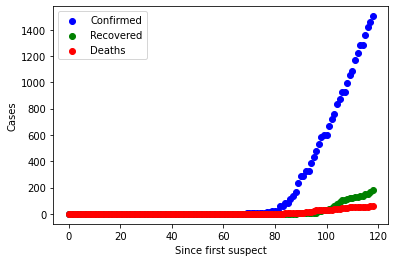

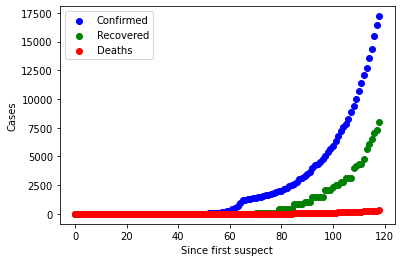

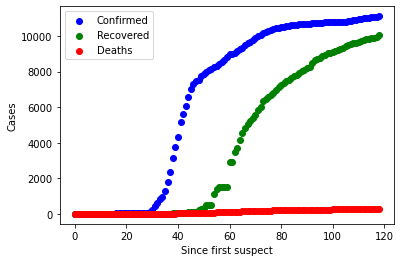

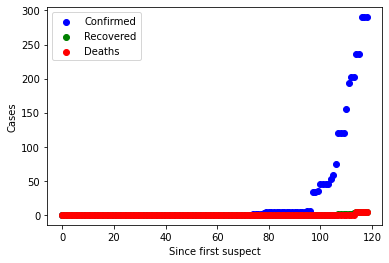

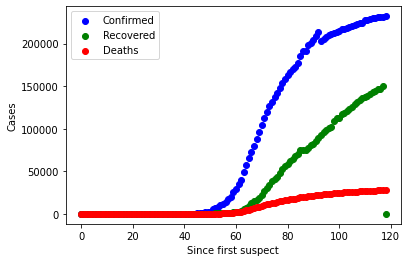

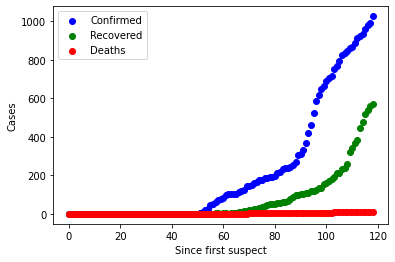

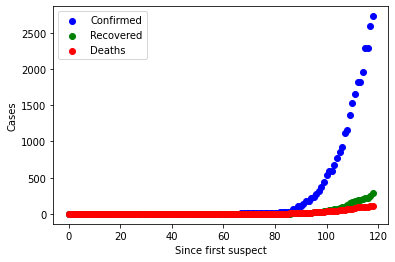

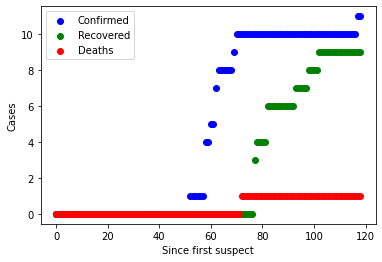

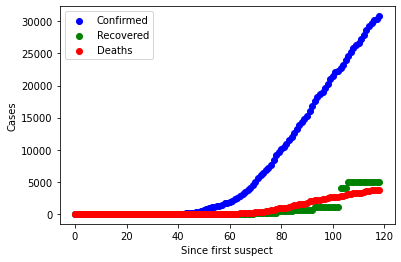

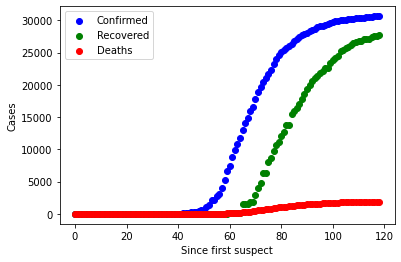

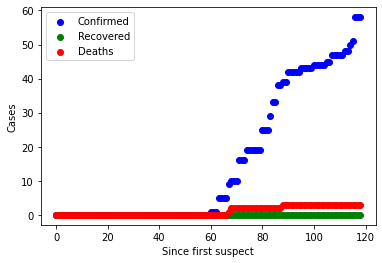

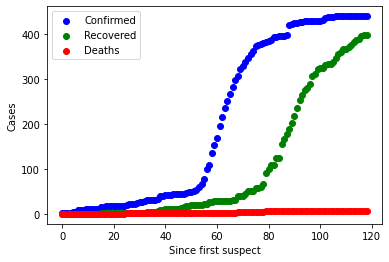

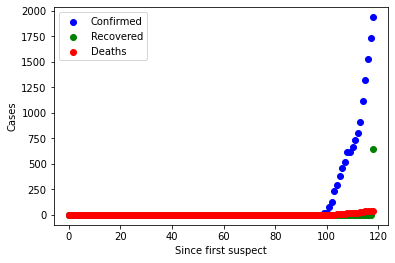

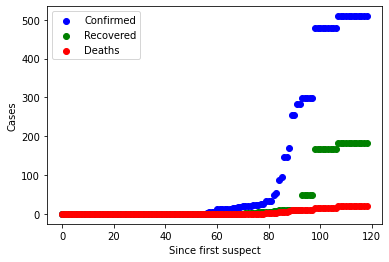

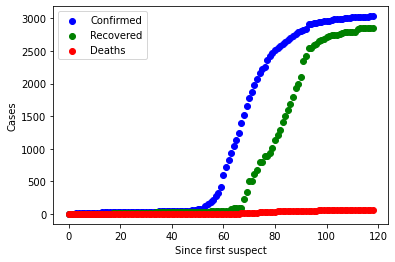

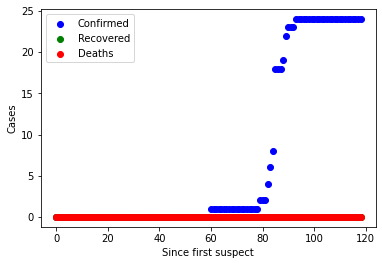

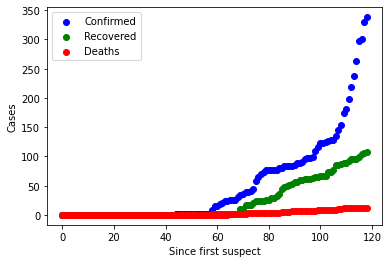

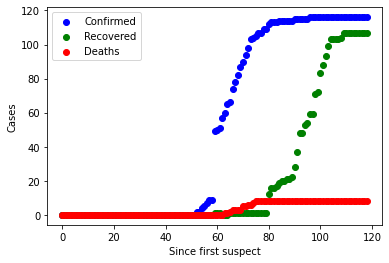

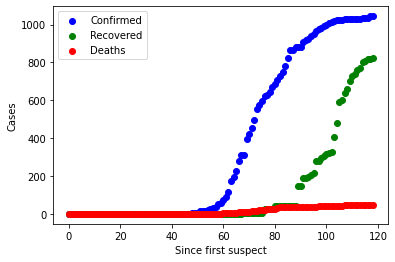

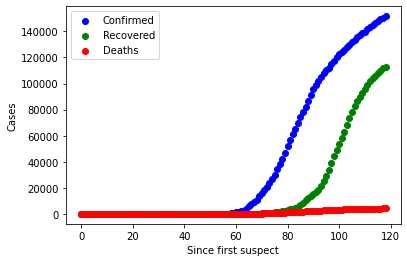

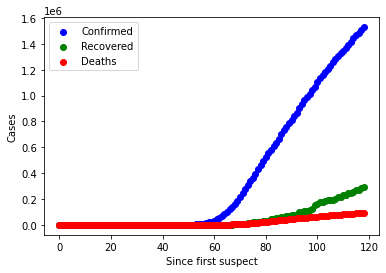

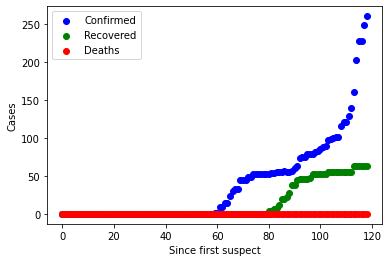

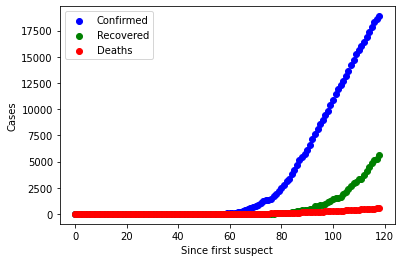

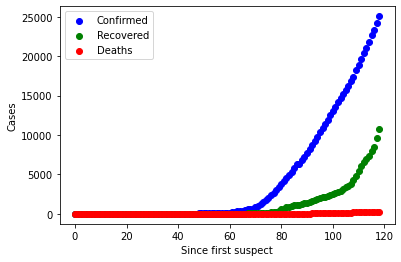

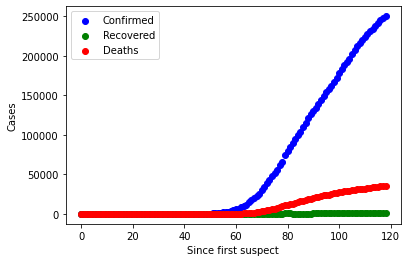

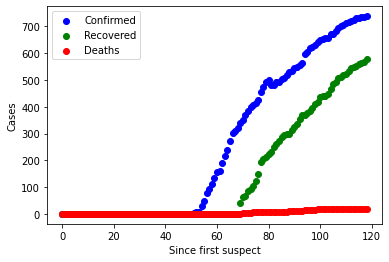

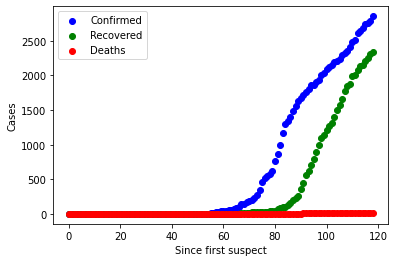

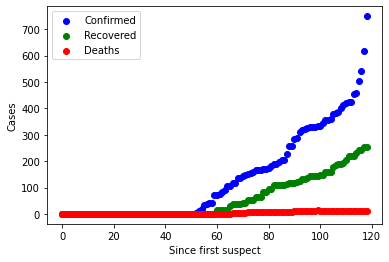

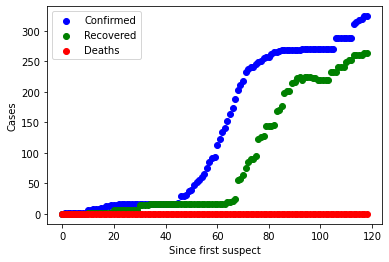

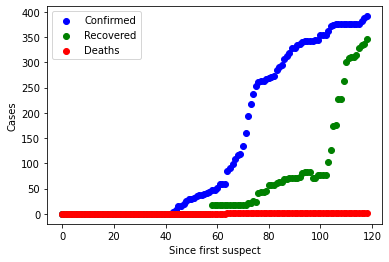

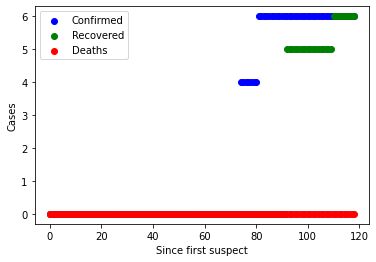

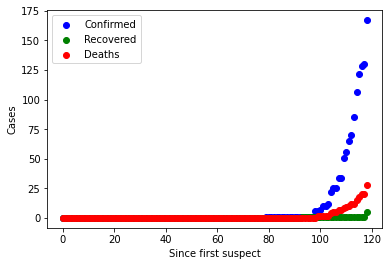

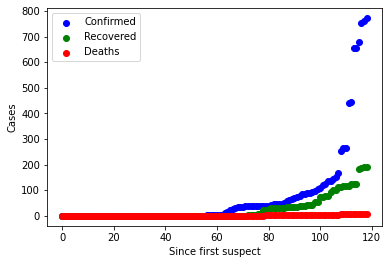

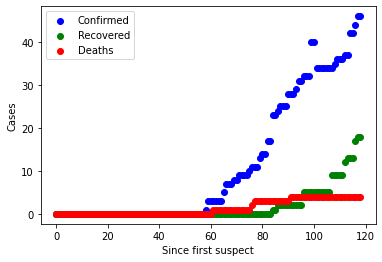

In [72]:
for i in range(0,len(total_countries)):
  C=df3[df3["Country"]==total_countries[i]].reset_index()
  plt.scatter(np.arange(0,len(C)),C['Confirmed'],color="blue",label="Confirmed")
  plt.scatter(np.arange(0,len(C)),C['Recovered'],color="green",label="Recovered")
  plt.scatter(np.arange(0,len(C)),C['Deaths'],color="red",label="Deaths")
  plt.xlabel("Since first suspect")
  plt.ylabel("Cases")
  plt.legend()
  plt.show()

In [73]:
df3=df2.groupby(['Date'])[['Confirmed','Deaths','Date',"Recovered"]].sum().reset_index()
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
...,...,...,...,...
114,2020-05-15,4542341,307666,1600051
115,2020-05-16,4634062,311781,1655256
116,2020-05-17,4713614,315185,1695290
117,2020-05-18,4801937,318481,1747514


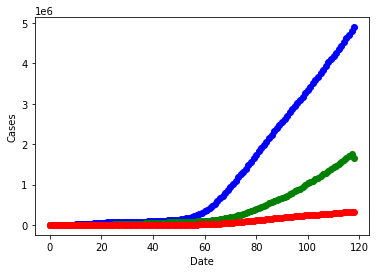

In [77]:
plt.scatter(np.arange(0,len(df3)),df3['Confirmed'],c="blue")
plt.scatter(np.arange(0,len(df3)),df3['Recovered'],c="green")
plt.scatter(np.arange(0,len(df3)),df3['Deaths'],c="red")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

In [103]:
df3=df2.groupby(['Country'])[['Confirmed','Deaths','Date',"Recovered"]].sum().reset_index()
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,Country,Confirmed,Deaths,Recovered
0,Afghanistan,115615,3211,13641
1,Albania,34319,1408,20212
2,Algeria,183263,19089,76184
3,Andorra,36237,1862,16176
4,Angola,1452,106,383


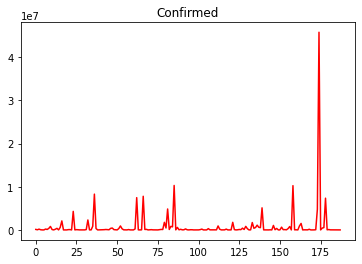

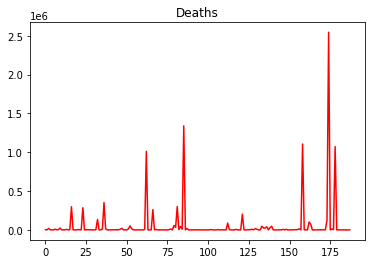

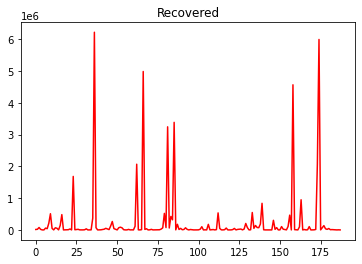

In [112]:
for i in ["Confirmed","Deaths","Recovered"]:
  plt.title(i)
  plt.plot(np.arange(0,len(df3)),df3[i],c="red")
  plt.show()